In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt 

In [10]:
def plot_areas(x, y, ax):
    """
    Input:
        x: NdArray with shape (N,2)
        y: NDArray with shape (N,1)
    
    Output:
        Plots x[0] in x asis and x[y] in y asis. Plots y corresponding to each value.
        
    """
    scale_false = lambda t: 50 if (t == 0) else 0
    scale_true  = lambda t: 50 if (t == 1) else 0
    color = lambda t: "r" if (t == 0) else "b"
    
    area1 = np.array([scale_false(yi) for yi in y])
    area2 = np.array([scale_true(yi) for yi in y])
    colors = np.array([color(yi) for yi in y])
    ax.scatter(x[:,0], x[:,1], area1,marker='x',c=colors)
    ax.scatter(x[:,0], x[:,1], area2,marker='o',c=colors)

## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$

In [7]:
def sigmoid_single(zi):
    """
    Input: 
        zi : scalar value 
    Output: 
        sigmoid function applied to zi
    """
    return 1 / (1 + math.exp(-zi))
    

def calculate_cost(x,y,w,b):
    """
    Input:
        x : NDArray(m,n) - m is number of training set, n is numer of features.
        y : NDArray(m,1) - output value for m examples.
        w : Parameters
        b : bias
    
    Output:
        Cost
    """
    m,n = x.shape
    loss = 0.0
    for i in range(m):
        zi = np.dot(x[i], w) + b
        gzi = sigmoid_single(zi)
        loss = loss + y[i]*np.log(gzi) + (1 - y[i])*np.log(1 - gzi)
    
    return -loss/m

In [8]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])   

In [9]:
w_tmp = np.array([1,1])
b_tmp = -3
print(calculate_cost(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


## Example
Now, let's see what the cost function output is for a different value of $w$. 

* In a previous lab, you plotted the decision boundary for  $b = -3, w_0 = 1, w_1 = 1$. That is, you had `b = -3, w = np.array([1,1])`.

* Let's say you want to see if $b = -4, w_0 = 1, w_1 = 1$, or `b = -4, w = np.array([1,1])` provides a better model.

Let's first plot the decision boundary for these two different $b$ values to see which one fits the data better.

* For $b = -3, w_0 = 1, w_1 = 1$, we'll plot $-3 + x_0+x_1 = 0$ (shown in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we'll plot $-4 + x_0+x_1 = 0$ (shown in magenta)

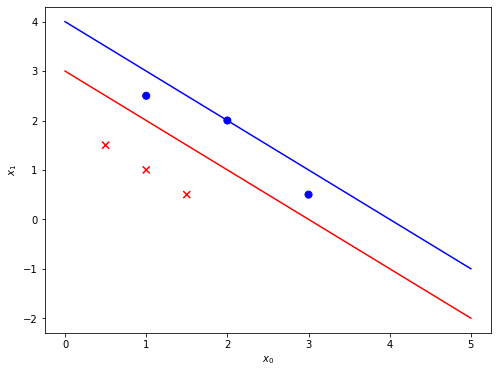

In [13]:
x = np.arange(0,6)
x3 = 3 - x
x4 = 4 - x

fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(x,x3, c = "r")
ax.plot(x,x4, c = "b")


plot_areas(X_train,y_train,ax)
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')

plt.show()

In [14]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", calculate_cost(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", calculate_cost(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461
